Mounted at /content/drive


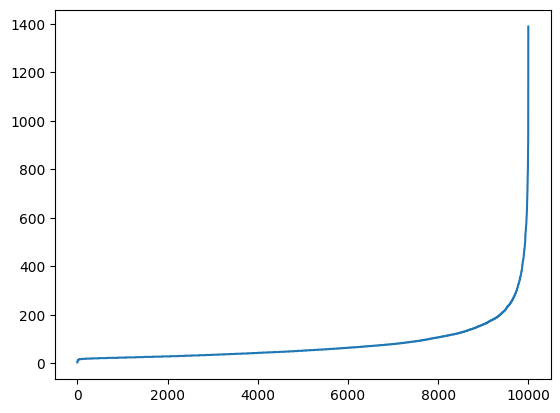

9376
['have', 'been', 'frequent', 'visitor', 'this', 'chain', 'for', 'few', 'years', 'now', 'sad', 'that', 'this', 'restaurant', 'decline', 'and', 'seems', 'that', 'the', 'management', 'completely', 'indifferent', 'had', 'the', 'unfortunate', 'experience', 'having', 'lunch', 'here', 'this', 'afternoon', 'The', 'service', 'poor', 'and', 'the', 'servers', 'bother', 'listen', 'your', 'requests', 'ordered', 'non', 'spicy', 'vegetarian', 'dish', 'for', 'parents', 'they', 'eat', 'spicy', 'food', 'when', 'the', 'dish', 'came', 'was', 'with', 'different', 'sauce', 'and', 'loaded', 'with', 'spices', 'the', 'server', 'requested', 'that', 'accept', 'the', 'dish', 'refused', 'and', 'could', 'immediately', 'see', 'his', 'displeasure', 'Overall', 'food', 'was', 'average', 'and', 'nothing', 'can', 'feel', 'good', 'about', 'Chicken', 'dish', 'tasted', 'stale', 'waste', 'your', 'money', 'here']
['have', 'always', 'visit', 'this', 'place', 'they', 'always', 'offer', 'good', 'food', 'The', 'one', 'thing'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Colab/딥러닝분석/Hotel_reviews_20k.csv', sep=',', encoding='utf-8' )
df = df.iloc[:, :2]

train_text = df.iloc[1::2, ]
test_text = df.iloc[0::2, ]

train_text = np.array(train_text)
test_text = np.array(test_text)

train_x = [sentence for sentence in train_text[:, 1]]
test_x = [sentence for sentence in test_text[:, 1]]

train_y = np.array([[int(sen)-1] for sen in train_text[:, 0]])
test_y = np.array([[int(sen) - 1] for sen in test_text[:, 0]])

import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_str(string):
    if isinstance(string, str):
        string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
        string = re.sub(r"\'s", " \'s", string)
        string = re.sub(r"\'ve", " \'ve", string)
        string = re.sub(r"n\'t", " n\'t", string)
        string = re.sub(r"\'re", " \'re", string)
        string = re.sub(r"\'d", " \'d", string)
        string = re.sub(r"\'ll", " \'ll", string)
        string = re.sub(r",", " , ", string)
        string = re.sub(r"!", " ! ", string)
        string = re.sub(r"\(", " \( ", string)
        string = re.sub(r"\)", " \) ", string)
        string = re.sub(r"\?", " \? ", string)
        string = re.sub(r"\s{2,}", " ", string)
        string = re.sub(r"\'{2,}", "\'", string)
        string = re.sub(r"\'", "", string)
    return string


train_text_X = [clean_str(sentence) for sentence in train_x]
sentences = [sentence.split(' ') if isinstance(sentence, str) else '' for sentence in train_text_X]

# 각 문장의 단어 길이 확인
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=200) for l in sentence_len]))

# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence[:200] if len(word) >= 3])
sentences = sentences_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, maxlen=200, padding='post')

# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=200),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)




In [ ]:
# 테스트 데이터 전처리
test_text_X = [clean_str(sentence) for sentence in test_x]
sentences = [sentence.split(' ') if isinstance(sentence, str) else '' for sentence in test_text_X]

# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence[:200] if len(word) >= 3])
sentences = sentences_new

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, maxlen=200, padding='post')


In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
df_pro = np.concatenate((train_X, test_X))

In [ ]:
y_pro = np.concatenate((train_y, test_y))
y_pro.shape

(20000, 1)

In [ ]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=200),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

model.evaluate(test_X, test_y, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          6000000   
                                                                 
 lstm_2 (LSTM)               (None, 50)                70200     
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6,070,455
Trainable params: 6,070,455
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 45s 658ms/step - loss: 1.4129 - accuracy: 0.3975 - val_loss: 1.4024 - val_accuracy: 0.3790
Epoch 2/5
63/63 [==============================] - 41s 646ms/step - loss: 1.3994 - accuracy: 0.4016 - val_loss: 1.4056 - val_accuracy: 0.3790
Epoch 3/5
63/63 [=======

[1.3979308605194092, 0.4056999981403351]

# 로지스틱

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


모델 정확도: 0.39975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.2985


# SVM

In [ ]:
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.40675


# 결정트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.289


#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


<ipython-input-13-cf3f4a4170fa>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.39575


# XGB

In [ ]:
import xgboost as xgb

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.40125


# LightGBM

In [ ]:
import lightgbm as lgb


# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df_pro, y_pro, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
lgb_train = lgb.Dataset(X_train, y_train)

# LightGBM 모델 학습
params = {
    'objective': 'multiclass',
    'num_class': 5
}
model = lgb.train(params, lgb_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39139
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 166
[LightGBM] [Info] Start training from score -2.753767
[LightGBM] [Info] Start training from score -2.742060
[LightGBM] [Info] Start training from score -1.509310
[LightGBM] [Info] Start training from score -1.388547
[LightGBM] [Info] Start training from score -0.912859
모델 정확도: 0.40875


# 80:20으로 딥 돌리기

In [ ]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=200),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(df_pro[:16000], y_pro[:16000], epochs=5, batch_size=128, validation_split=0.2)

model.evaluate(df_pro[16000:], y_pro[16000:], verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          6000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6,070,455
Trainable params: 6,070,455
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
100/100 [==============================] - 64s 626ms/step - loss: 1.4159 - accuracy: 0.3926 - val_loss: 1.3922 - val_accuracy: 0.4066
Epoch 2/5
100/100 [==============================] - 62s 619ms/step - loss: 1.4031 - accuracy: 0.3970 - val_loss: 1.3858 - val_accuracy: 0.4066
Epoch 3/5
100/100 [=

[1.3973389863967896, 0.4115000069141388]

In [ ]:
df_pro.shape

(20000, 200)